In [1]:
from phase_margin import *
%matplotlib inline
###This are the imported packages.

#Phase margin demo

This notebook is designed to make the students learn about the phase margin of a proportional controller. It will show how to calculate the phase margin with a Bode plot and Nyquist diagram. 
<br>


<img src='feedback_pitch2.png'>    

The phase margin is the difference between the angle at the the frequency, at which the magnitude is equal to $0$ dB(= when $|P(jw_0)C(jw_0)|=1$), and $-180°$.
<br>
You can see this on the Bode plot and on the Nyquist plot:
<br>
 - On the Bode plot you just look at what frequency the magnitude plot is $0 dB$  and see what the difference is between the angle at that frequency and $-180°$.
 - At the Nyquist plot you calculate the argument that the Nyquist diagram makes with the unity circle.
<br>
<br> For $H(s)= \frac{1}{s^2+s}$ is this for example $52°$

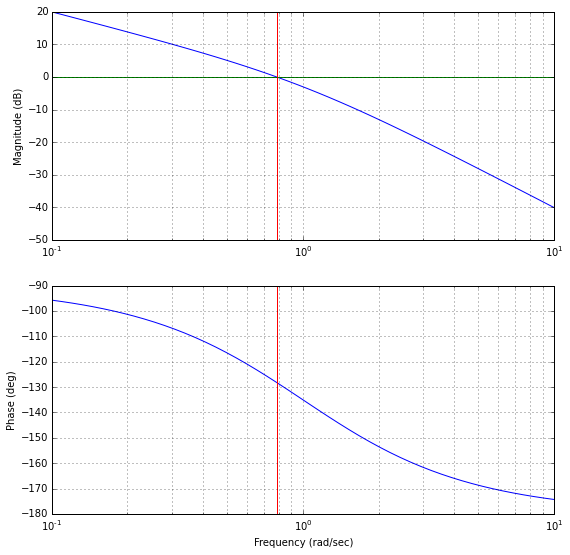

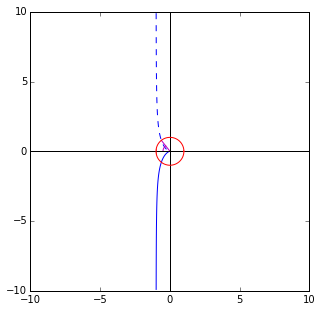

In [2]:

num = [1]
den = [1,1,0]
TF = control.TransferFunction(num,den)
control.bode(TF,dB=True)
draw_lines_bode(TF)
plt.show ()
control.nyquist_plot(TF,Plot=True, color='b', labelFreq=0)
draw_lines_nyquist(TF)
plt.show ()


We calculated the phase margin at the beginning, when there was no controller yet. A proportional controller $C(s)$ has a certain constant value $K$, that has an influence on the magnitude plot. (But not on the phase plot!)
<br>
A design objective can be: 
"Design the controller in order that there is at least 30° degrees phase margin."
<br>
<br>
If we look at $H(s)= \frac{1}{(s^2+s)}$ again and we want at least $30°$ phase margin, the maximum value for $K$ is $3.46$. 
To find this value, determine on the phase plot the frequency at which the phase plot equals $-150°$. Then, see what the amplitude at that frequency is. With that amplitude,$ K$ can easily be calculated. Since the $amplitude = 20*log_{10}(K)$, $K = 10^{\frac{amplitude}{20}}$.

<br> This gives $K=3.46$

## Your turn

Let's try now to calculate the phase margin of a chosen transfer function. A hint, not all transfer functions have a phase margin, look carefull at the Bode plot first! Give in the coëfficiënts of the transfer function.          

Enter the numerator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= 1
Enter the denominator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= 1,2,0
Transfer function:

    1
---------
s^2 + 2 s



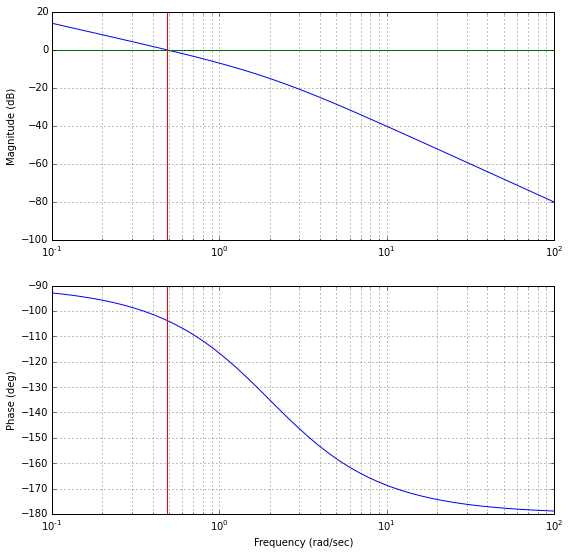

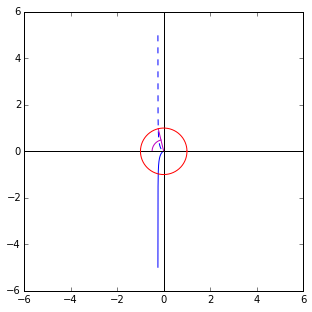

Not all transfer functions are necessarily good transfer functions.
So, do you want to continue with your given transfer function?(Y/N)Y

The phase margin is,  76.345415254 °


In [4]:
#These while-loops make sure that the user gives in the usefull input.

#After plotting the transfer function, the user can see if it makes sense to continue 
#with the transfer function.
#The next loops give the user the possibility to change his/her transfer function and always plots
#the bode plot of the transfer function.
YN = False
while not YN:
    Num = input_handler_lst("Enter the numerator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
    DeNom = input_handler_lst("Enter the denominator of the transfer function(a_n*s^n+...+a_1*s+a_0 = a_n, ..., a_1, a_0 )= ")
    TF_in = control.TransferFunction(Num,DeNom)
    print "Transfer function:"
    print TF_in
    control.bode(TF_in,dB=True)
    draw_lines_bode(TF_in)
    plt.show ()
    control.nyquist_plot(TF_in,Plot=True, color='b', labelFreq=0,omega=np.linspace(10**-1,10**2,10**5))
    draw_lines_nyquist(TF_in)
    plt.show ()
    print "Not all transfer functions are necessarily good transfer functions."
    YN = input_handler_y_n("So, do you want to continue with your given transfer function?(Y/N)")

### The next command show the phasemargin to the user        
GM,PM,X1,X2 = control.margin(TF_in)
if PM == None:
    print 
    print "The phase margin is either very high, or not defined."
else:
    print 
    print "The phase margin is, ",PM,"°"

In this section we calculate the maximum value of K such that a given phase margin is reached.

Enter the desired phase margin: 3

The maximum gain to maintain a phase margin of 3.0 ° is 1458.36


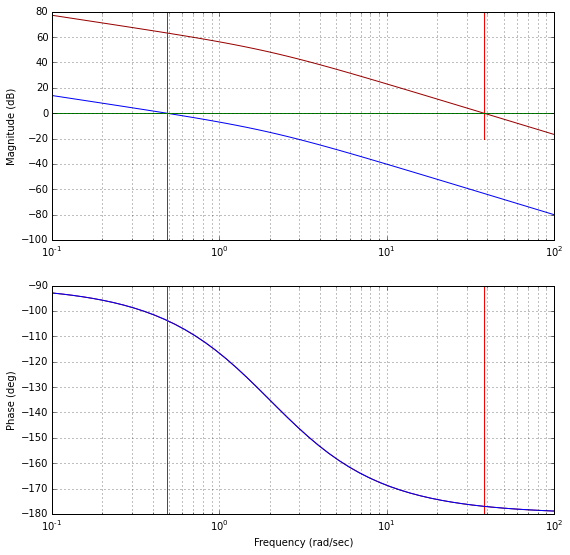

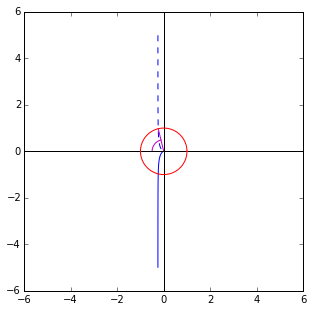

In [7]:
gm,pm,x1,x2 = control.margin(TF_in)
mag_test,phase_test,omega_test= control.bode(TF_in,dB=True,Plot = False)
mag_in, phase_in, omega_in = control.bode(TF_in,dB=True,Plot = False,omega= np.linspace(omega_test[0],omega_test[-1],10**5))
wanted_margin = input_number("Enter the desired phase margin: ")
K = None
omega_res = passes_degree(phase_in,-(180-wanted_margin))
if omega_res != None:
    amp = -mag_in[omega_res]
    K = 10.**(amp/20.)
    print 
    print "The maximum gain to maintain a phase margin of %s ° is" %wanted_margin,round(K,2)
else:
    print 
    print "Transfer function doesn't make sense"
if K != None:
    control.bode(K*TF_in,dB=True,color='#990000')
    draw_lines_bode(K*TF_in)
control.bode(TF_in,dB=True)
draw_lines_bode(TF_in)
plt.show ()